In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Welcome to a full guide on Support Vector Machine a.k.a. SVM 🧨⚡

## In this guide, I'll be explaining about how SVM works and the mathematical rigor taking place behind the scenes. 
### If you wish to check out other expositions of mine, I have wrote about [linear regression](https://www.kaggle.com/code/kimmik123/all-about-linear-regression) and [logistic regression](https://www.kaggle.com/code/kimmik123/all-about-logistic-regression) so please feel free to check them out!

# 1. Introduction

#### Support Vector Machines... all of this may sound very foreign for some of you. 
#### Why is it called a machine? 
#### What are support vectors? What are they supporting?

#### Don't be frightened. I'm here to walk you guys through this scary sounding algorithm. 
#### Despite it's daunting name, SVM is basically a **classification** algorithm and a **supervised** one.

#### However the way SVM classifies points is by dividing these points into regions so that they can be classified differently.
#### For visualization purposes, below is a very simple graph of how you can visualize this algorithm.

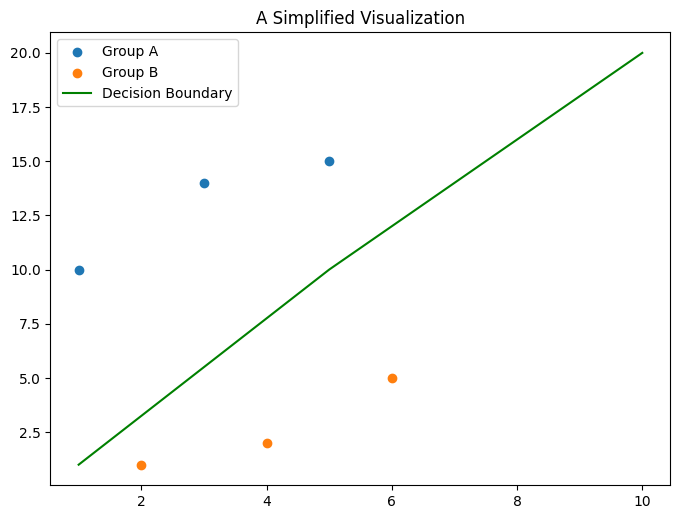

In [2]:
X_1 = [1, 3, 5]
y_1 = [10, 14, 15]
X_2 = [2, 4, 6]
y_2 = [1, 2, 5]
X_new = [1, 5, 10]
y_new = [1, 10, 20]

figure(figsize=(8, 6), dpi=100)
plt.title("A Simplified Visualization")
plt.scatter(X_1,y_1, label='Group A')
plt.scatter(X_2, y_2, label='Group B')
plt.plot(X_new, y_new, color='green', label='Decision Boundary')
plt.legend()
plt.show()

#### Now of course the algorithm is not this simple. As most of us are aware, real world datasets consist of way more than merely 2 features. 
#### This graph showcases a 2 dimensional decision boundary, a line, separating the points.
#### And of course, we can't just eyeball and draw up a boundary just from observing the point distributions.
#### When the dimensions reach a spectacular fashion, trust me, there is no way on earth you can visualize the distribution of points.

#### So now that you have read and understood at least roughly how SVM works, allow me to dive into the mathematical expressions and definitions.
#### I will say upfront that the math required for SVM is tougher than other algorithms I have described so far, so if you don't understand any concepts, please feel free to check out the links I will be providing throughout this exposition! 

## Let's dive in then, shall we?

![](https://images.unsplash.com/photo-1600711725615-d7dfb2215244?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80)

# 2. Basic Concept

#### So I have mentioned that SVM utilizes a decision boundary to divide points into their respective classes.
#### So a sensible question one may ask is "How do we express the equation of this decision boundary?"

$$\LARGE w\cdot x + b  = 0$$

#### where 

$$\large w \cdot x = w_1x_1 + ... + w_nx_n $$

#### where n is the number of features in a multidimensional problem. 
#### When n is bigger than 3, the decision boundary can be called the *hyperplane*.

#### Now that is the equation of the decision boundary. 
#### But then how do we decide on the datapoints' different class allocation?

$$\LARGE w \cdot x + b \geq  +1 $$
#### when 
$$\LARGE y = +1 $$

#### and

$$\LARGE w \cdot x + b \leq  -1 $$
#### when 
$$\LARGE y = -1 $$


<div style="width:100%;text-align: center;"> <img align=middle src="https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_001.png"  style="height:400px;margin-top:3rem;"> </div>

#### As you can see, for those points that obtain a value greater than +1 will be allocated +1 while the vice versa is true.
#### As you can see from the picture above, the dotted lines represent the two different inequality equations. 
#### The solid line going through the middle of those two dotted lines is $\small w \cdot x + b = 0 $

#### This is also where I introduce to you the support vectors. 
#### Now the support vectors actually refer to the points that lie closest to the decision boundary.
#### They are the most crucial points in the sense that if they are removed or altered with, the whole decision boundary could change.
#### This also means that moving other datapoints that are not the support vectors do not alter with the decision boundary.

#### Now this is a very important point to keep in mind because now we're going to jump into optimization of the algorithm which is the most important section for any machine learning models.
#### **SVM's optimization algorithm is to generate the weights proceeds in such a way that only the support vectors determine the weights and thus the boundary.**

# 3. Optimization

#### So now that we all know the decision boundary is the main character in SVM, how do we come up with the best decision boundary such that the different points can be classified to the best of the algorithm's capabilities?

#### In simple terms, we have to come up with a boundary that separates our + & - datapoints with the greatest margin.
#### Now what do I mean by greatest margin?
#### The greatest margin in the sense that the distance between the two dotted line we see above is the greatest, furthest.
#### The larger the margin, the better the generalization of points.

### So how do we express this idea **mathematically**?

#### I will be expressing the two dotted lines as H1 and H2 respectively and the decision boundary as H0 from now on.
#### With this in mind, let's first figure out the distance between H0 and H1.

#### Now a fundamental concept we have to know here is the [distance from a point to a line](https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line#An_algebraic_proof) which is 

$$\LARGE distance((x_0, y_0) , ax+by+c=0) = \frac {|ax_0 + by_0 + c|} {\sqrt{a^2 + b^2}}$$

#### Keeping this in mind, we can calculate the distance between H0 and H1 to be 

$$\LARGE \frac{|wx+b|} {|w|} = \frac{1}{|w|}$$

#### since $\small wx+b = 1$ for H1

#### Now that we know the distance from H0 and H1, we can easily calculate the distance from H0 and H2 and observe that the distance is the same.

#### Therefore, to obtain the largest margin, distance between H1 and H2, $\large \frac{2}{|w|} $ has to be the greatest.
### This means that to maximize the above, we would have to minimize $\large |w|$

#### However, optimization is not that simple, just by minimizing $\large |w|$
#### Remember that we had some conditions, or better known as constraints, for our algorithm which can be combined into the form

$$\LARGE y(x \cdot w + b) \geq 1 $$

#### That was a lot of math above, so let me just sum all of that up in one single statement. 
#### Our optimization is to minimize

$$\LARGE \frac{1}{2} |w|^2 $$

#### with respect to

$$\LARGE y(x \cdot w + b) -1 \geq 0 $$

#### Now you might be asking why did the minimization condition suddenly change? 
#### It is common practice for machine learning algorithms, the optimization equation/process should be a quadratic.
#### Furthermore, minimizing $\large |w|$ or minimizing $\large \frac{1}{2} |w|^2 $ achieves the same result.

#### Now, I regret to inform you that this is just the beginning of the mathematical rigor 😅
#### So now that we have the optimization summed up in one single statement, let us go hunt for the optimized weights!

<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1522869870356-127b04d38aa1?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=687&q=80"  style="height:400px;margin-top:3rem;"> </div>

# 4. Solving Optimization Problem

#### Before we dive into the solution, I would like to inform you that this is called **Hard Margin SVM**.
#### Hard Margin SVM are as they sound, pretty rigid. 
#### They do not tolerate any outliers and do not work with non-linearly separable data.
#### I will only be talking about Hard Margin SVM here, to steer you guys away from too much math exposure 🤣
## However, if you guys want to see the other alternative of SVM, do let me know in the comments and I will write about it! 

#### Now let us jump right into the math! 

#### Now for those of you who have studied intermediate or advanced calculus, you guys would be fully aware of the [Lagrange multiplier method](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/constrained-optimization/a/lagrange-multipliers-single-constraint).
#### For those of you not aware of it, it is a method for finding the local maxima and minima of a function subject to equality constraints which is exactly our predicament right now.

#### The basic Lagrange multiplier method takes the form 

$$\LARGE \nabla f(x) - \lambda\nabla g(x) = 0 $$

#### where lambda is the Lagrange multiplier and where

$$\LARGE \nabla f(x) = \frac{1}{2} |w|^2 ,  \nabla g(x) = y(x \cdot w + b) -1 $$

#### The Lagrange function then can be expressed as

$$\LARGE \mathcal{L}(w, b, \lambda) = \frac{1}{2} |w|^2 - \sum_{i=1}^{i=m} \lambda_i [y_i(x \cdot w + b) -1]$$

#### and our objective now is to find a w & b such that it minimizes the maximum values of $\large \mathcal{L}(w, b, \lambda) $

$$\LARGE \min_{w,b} max \mathcal{L}(w, b, \lambda) $$
$$\LARGE \lambda_i \geq 0$$

# 4.1 Now this is the [Lagrangian primal problem](https://en.wikipedia.org/wiki/Duality_(optimization).


#### If the word primal sounds absolutely new to you, that's totally fine. 
#### All you need to know is that *if the primal is a minimization problem then the dual is a maximization problem (and vice-versa)*.
#### Just keep this information in mind and you should be fine for this article.
#### But for those of you really curious for the whole idea of duality, do check out the link above. 

#### Now let us see what the **dual problem** is for the above primal problem.
#### For those of you questioning this decision, I'll surprise you in a short while so hold on. 

$$\LARGE \nabla_w \mathcal{L}(w, b, \lambda) = w -  \sum_{i=1}^{m}\lambda_iy_ix_i = 0$$

$$\LARGE \nabla_b \mathcal{L}(w, b, \lambda) = -  \sum_{i=1}^{m}\lambda_iy_i = 0$$

#### From the two equations above, we obtain the following information.

$$\LARGE w = \sum_{i=1}^{m}\lambda_iy_ix_i $$
$$\LARGE \sum_{i=1}^{m}\lambda_iy_i = 0 $$

#### Let us substitute the above information into the primal problem.

$$\LARGE \frac{1}{2} |w|^2 - \sum_{i=1}^{m} \lambda_i [y_i(x \cdot w + b) -1]$$
$$\LARGE =\frac{1}{2} w^Tw - \sum_{i=1}^{m} \lambda_i [y_i(x \cdot w + b)] + \sum_{i=1}^{m} \lambda_i$$
$$\LARGE =\frac{1}{2} w^Tw - \sum_{i=1}^{m} \lambda_i y_iw^Tx_i -  \sum_{i=1}^{m} \lambda_iy_ib + \sum_{i=1}^{m} \lambda_i$$
$$\LARGE =\frac{1}{2} w^Tw - w^T(\sum_{i=1}^{m} \lambda_i y_ix_i) -  b(\sum_{i=1}^{m} \lambda_iy_i) + \sum_{i=1}^{m} \lambda_i$$
$$\LARGE =\frac{1}{2} w^Tw - w^Tw -  b(0) + \sum_{i=1}^{m} \lambda_i$$
$$\LARGE =-\frac{1}{2} w^Tw + \sum_{i=1}^{m} \lambda_i$$
$$\LARGE = \sum_{i=1}^{m} \lambda_i -\frac{1}{2} ( \sum_{i=1}^{m}\lambda_iy_ix_i)^T( \sum_{i=1}^{m}\lambda_iy_ix_i) $$
$$\LARGE = \sum_{i=1}^{m} \lambda_i -\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \lambda_i \lambda_j y_i y_j x_i x_j$$

#### Thus we obtain the dual problem of 

$$\LARGE \max_\lambda \sum_{i=1}^{m} \lambda_i -\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \lambda_i \lambda_j y_i y_j x_i x_j $$

#### Now for those of you who were questioning why are we obtaining the dual problem, do you see what happened here?
#### The objective function now only depends on the Lagrangian multipliers, which is easier to be solved analytically.

# 4.2 Solving for w and b

#### Now after solving the above dual problem, which should be no problem as it is just like any calculus problem, we would obtain a vector containing the various Lagrangian  multipliers for every data points.

#### To solve for $\large w$, we just need to utilize this equation $\large  w = \sum_{i=1}^{m}\lambda_iy_ix_i $

#### Now to solve for $\large b $, there is a long explanation behind it which utilizes the [KKT (Karush-Kuhn-Tucker) conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) so I will just provide the equation but do check out the explanation if you're curious.

$$\LARGE b = \frac{1}{S} \sum_{i=1}^{S}(y_i-w \cdot x) $$

#### where $\large S $ is the number of support vectors.

#### So after obtaining $\large w $ and $\large b$ that we were looking for, we can then use this decision boundary to make predictions.

$$\LARGE  h(x_i) = \begin{cases} \mbox{+1,} & \mbox{if } wx + b \geq 0 \\ \mbox{-1,} & \mbox{if } wx + b < 0 \end{cases}  $$

## And ladies and gentlemen, that is the math behind this very rigorous and complex Support Vector Machine Algorithm.

# 5. Conclusion

#### Now that was a lot of mathematical jargons and equations wasn't it? 
#### Congratulate yourselves for coming this far!
#### I know all of this might be too much to take in initially but reading the other links would help out a ton. 

#### If you guys want to see the Soft Margin alternative or want to see how this algorithm is coded from scratch, do leave it in the comments below! 

#### As always, an upvote on this notebook would go a long way 😀


#### Till next time, cheers!

# 6. Credits
* https://web.mit.edu/6.034/wwwbob/svm.pdf
* https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/
* http://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-duality-problem/#duality-hard-margin-classifier
* https://en.wikipedia.org/wiki/Duality_(optimization)
